[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mravanba/comp551-notebooks/blob/master/KNN.ipynb)

# K-Nearest Neighbours 
Our goal is to implement a K-NN classifier and apply it to classify the Iris dataset.

##Data processing and visualization

We always have this set of imports at the beginning of our notebooks and set the random seed.

In [ ]:
import numpy as np
import pandas as pd
#the output of plotting commands is displayed inline within frontends
%matplotlib inline                                  
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace         #for debugging 
from operator import itemgetter
from sklearn.model_selection import train_test_split

#it is important to set the seed for reproducibility as it initializes the random number generator
np.random.seed(1232)

We conveniently load the dataset from the sklearn collection of datasets. In this notebook we use the Iris dataset.

In [ ]:
import urllib.request
from io import StringIO

with urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff') as f:
    html = f.read().decode('utf-8')
f = html.split("@")
f = f[22][5:]
TESTDATA = StringIO(f)
df2 = pd.read_csv(TESTDATA)
df2.columns =['QUALITY ASSESSMENT', 'RETINAL ABNORMALITY', 'MA ALPHA 0.5', 'MA ALPHA 0.6','MA ALPHA 0.7','MA ALPHA 0.8','MA ALPHA 0.9','MA ALPHA 1','EXUDATES 8','EXUDATES 9','EXUDATES 10','EXUDATES 11','EXUDATES 12','EXUDATES 13','EXUDATES 14','EXUDATES 15','DISTANCE','DIAMETER','AM/FM','CONTAINS DR']
# df.dtypes

c = df2.corr()

s = c.unstack()
so = s.sort_values(kind="quicksort")
so.to_csv("feature_corr_diabetes.csv")
from google.colab import files
#files.download("feature_corr_diabetes.csv")
print(so[-60:-10])
df2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EXUDATES 12          EXUDATES 11            0.825764
EXUDATES 11          EXUDATES 12            0.825764
MA ALPHA 1           MA ALPHA 0.5           0.859593
MA ALPHA 0.5         MA ALPHA 1             0.859593
MA ALPHA 1           MA ALPHA 0.6           0.883490
MA ALPHA 0.6         MA ALPHA 1             0.883490
EXUDATES 13          EXUDATES 14            0.906371
EXUDATES 14          EXUDATES 13            0.906371
MA ALPHA 0.7         MA ALPHA 1             0.916183
MA ALPHA 1           MA ALPHA 0.7           0.916183
EXUDATES 9           EXUDATES 10            0.919585
EXUDATES 10          EXUDATES 9             0.919585
MA ALPHA 0.5         MA ALPHA 0.9           0.925254
MA ALPHA 0.9         MA ALPHA 0.5           0.925254
EXUDATES 12          EXUDATES 13            0.931659
EXUDATES 13          EXUDATES 12            0.931659
EXUDATES 14          EXUDATES 15            0.943458
EXUDATES 15          EXUDATES 14            0.943458
MA ALPHA 0.6         MA ALPHA 0.9           0.

,QUALITY ASSESSMENT,RETINAL ABNORMALITY,MA ALPHA 0.5,MA ALPHA 0.6,MA ALPHA 0.7,MA ALPHA 0.8,MA ALPHA 0.9,MA ALPHA 1,EXUDATES 8,EXUDATES 9,EXUDATES 10,EXUDATES 11,EXUDATES 12,EXUDATES 13,EXUDATES 14,EXUDATES 15,DISTANCE,DIAMETER,AM/FM,CONTAINS DR
0,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
1,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
2,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
3,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
4,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1146,1,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1147,1,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1148,1,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


We create the input matrix $X \in \mathbb{R}^{N \times D}$ and the output vector $y \in \{1,\ldots,C\}^N$.
Let's only use `sepal length` and `sepal width` for classification. We then randomly split the data into train and test and visualize the data.

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


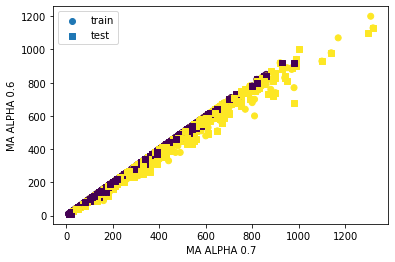

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


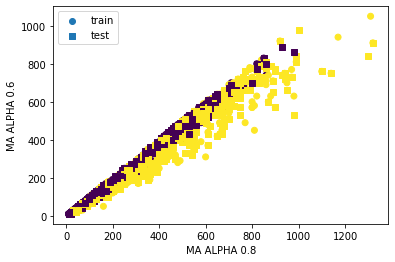

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


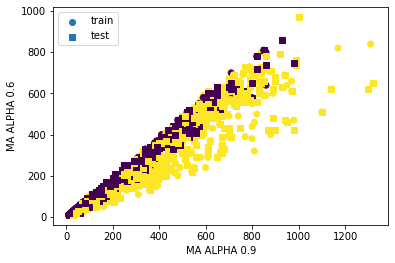

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


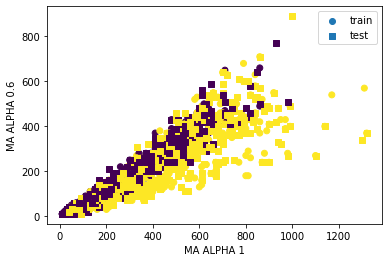

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


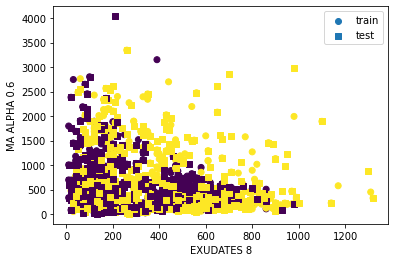

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


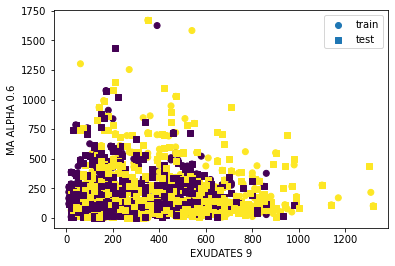

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


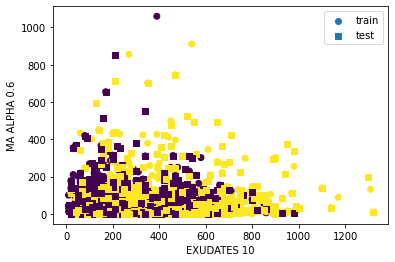

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


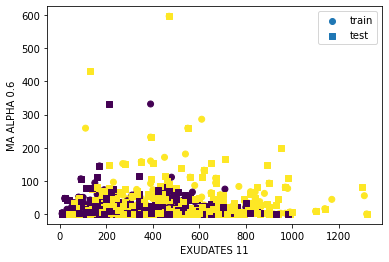

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


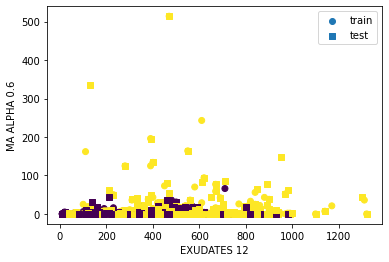

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


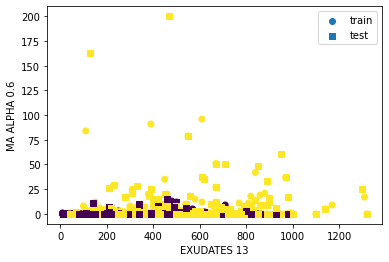

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


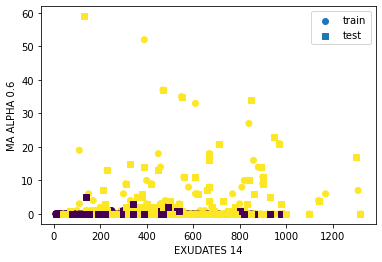

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


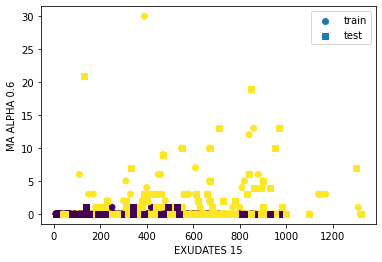

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


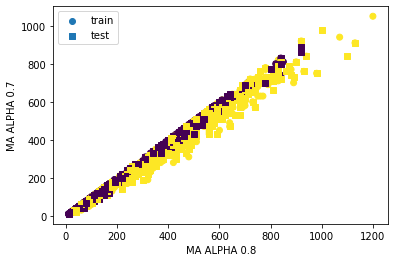

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


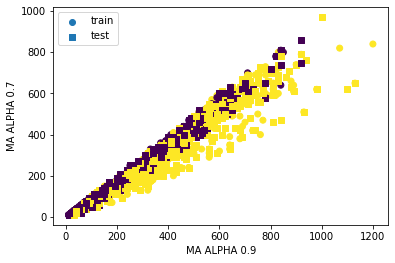

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


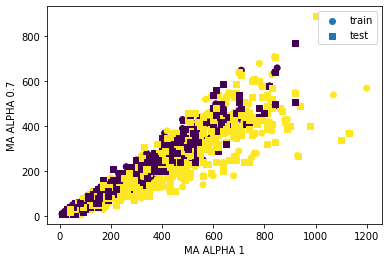

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


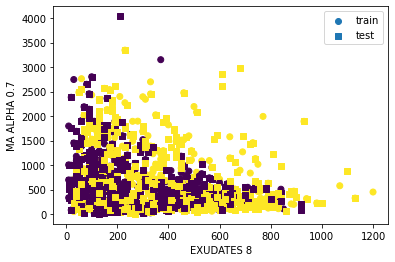

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


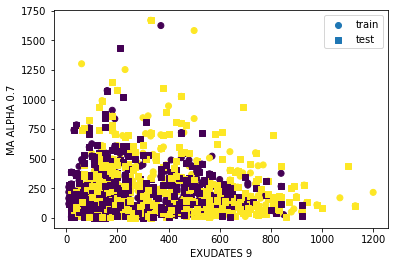

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


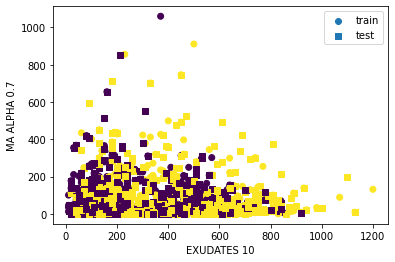

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


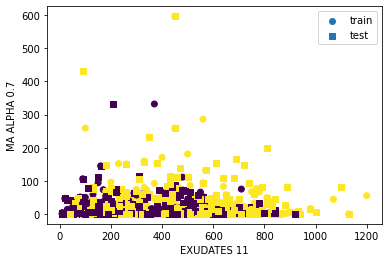

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


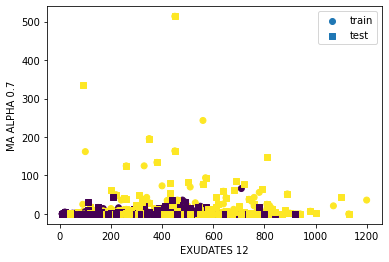

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


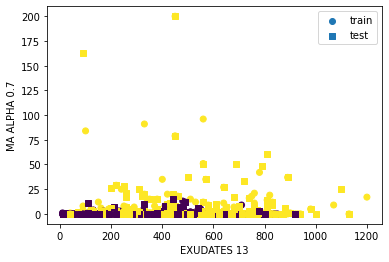

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


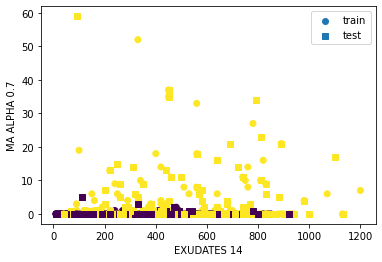

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


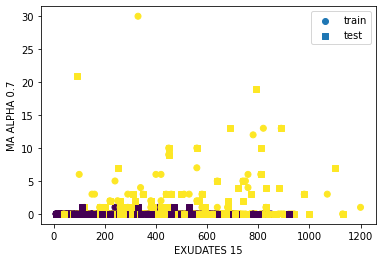

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


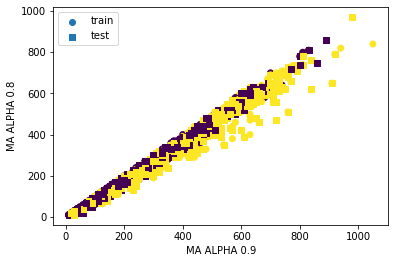

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


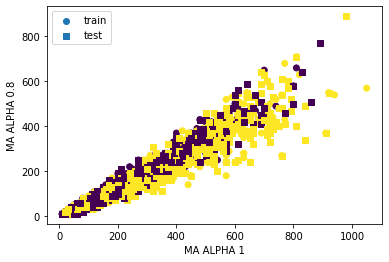

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


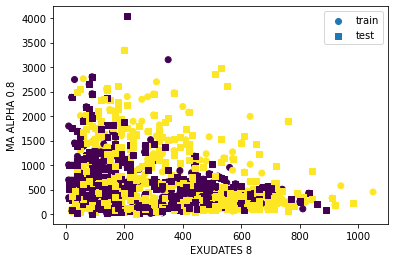

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


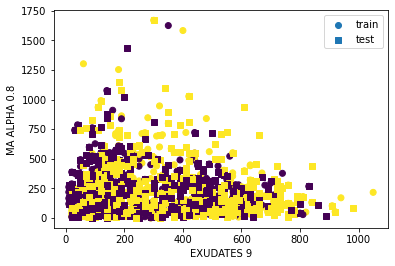

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


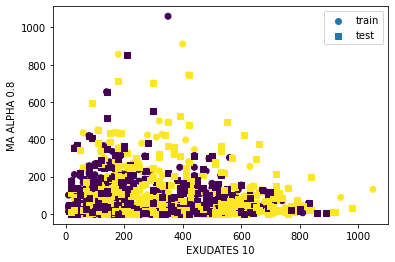

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


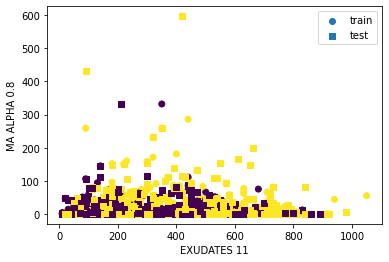

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


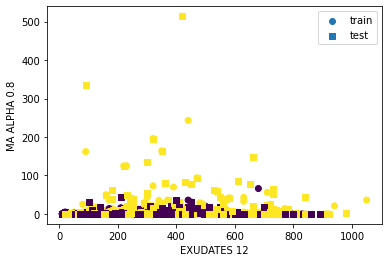

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


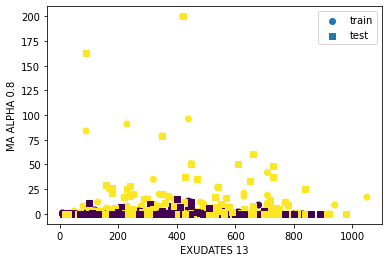

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


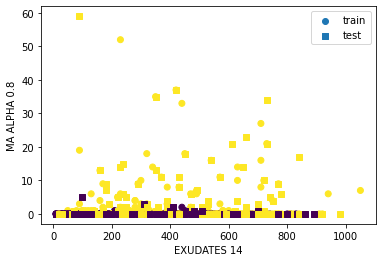

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


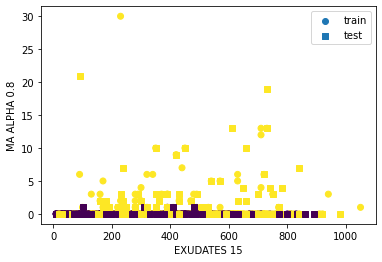

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


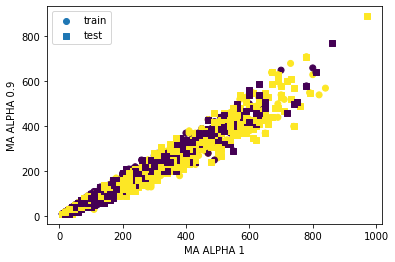

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


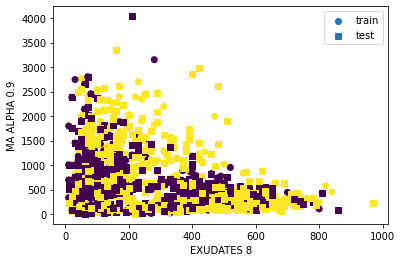

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


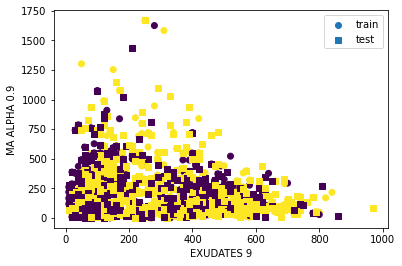

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


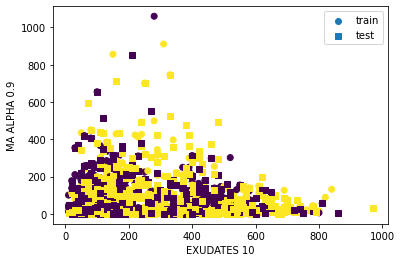

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


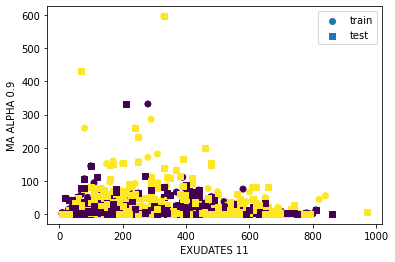

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


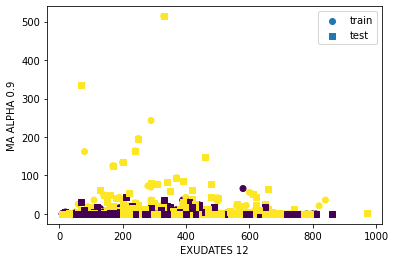

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


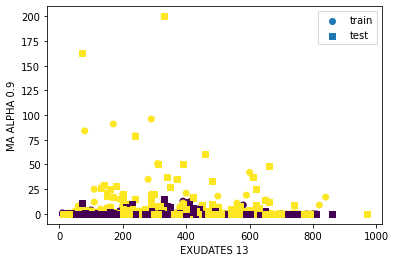

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


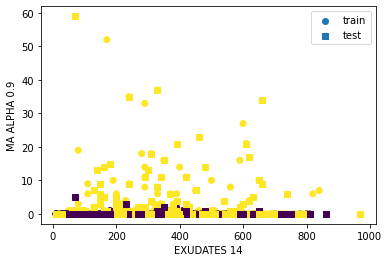

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


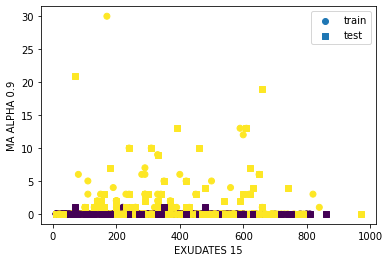

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


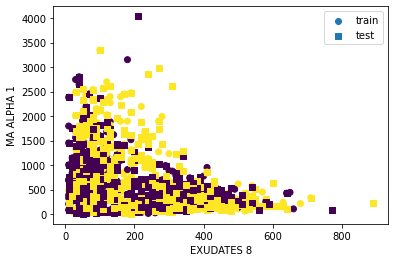

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


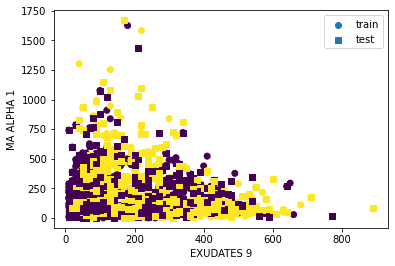

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


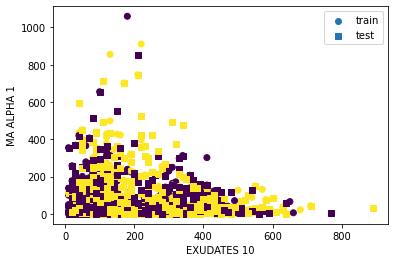

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


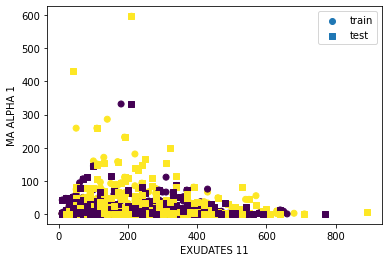

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


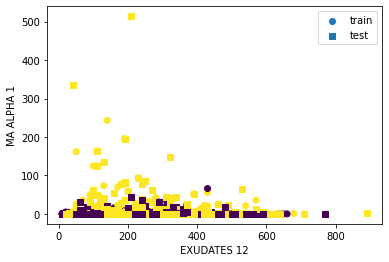

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


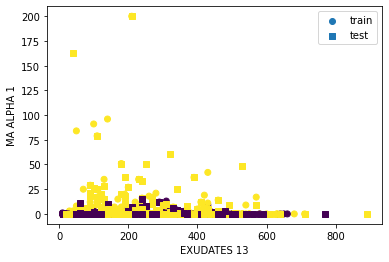

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


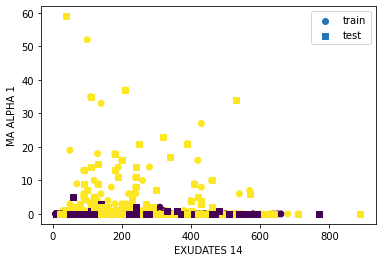

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


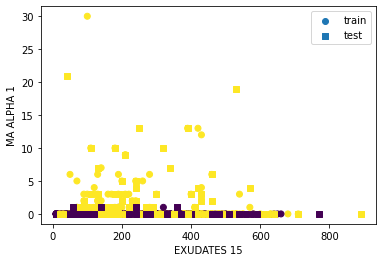

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


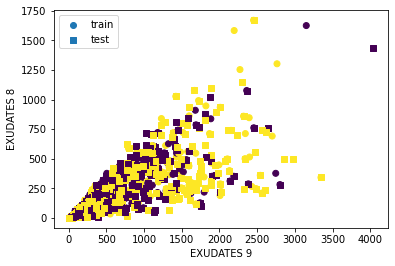

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


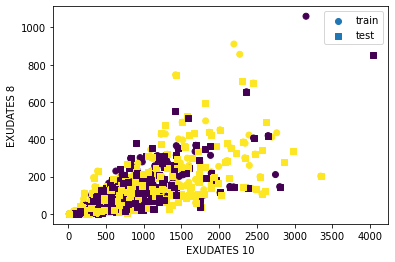

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


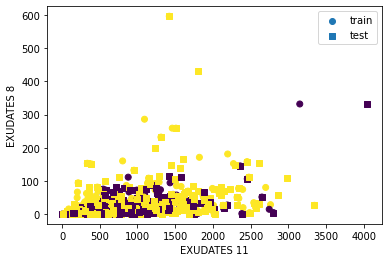

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


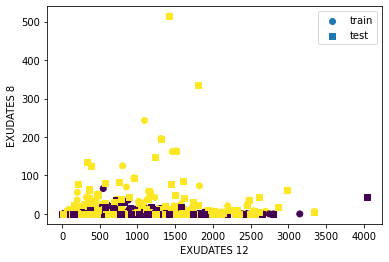

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


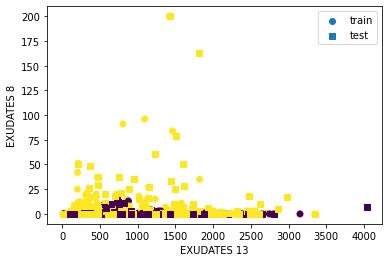

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


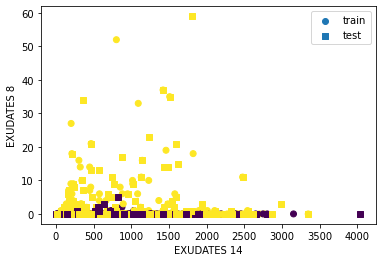

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


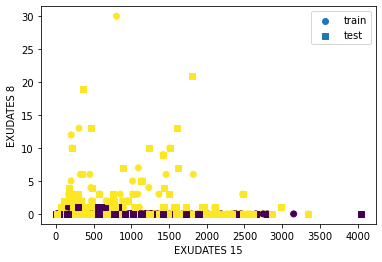

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


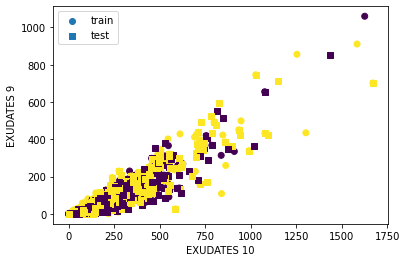

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


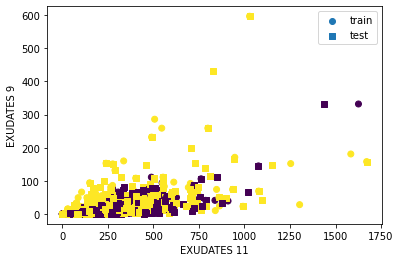

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


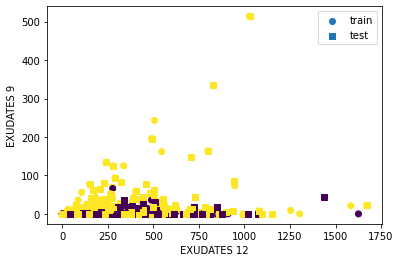

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


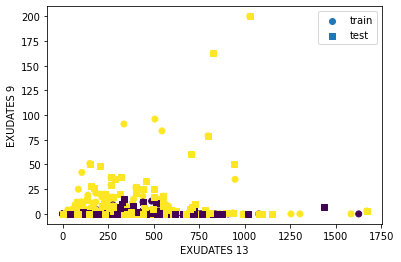

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


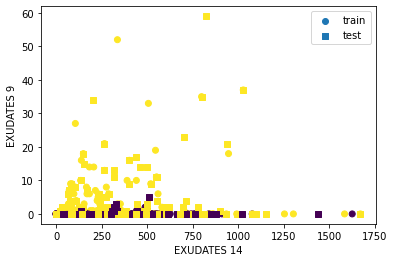

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


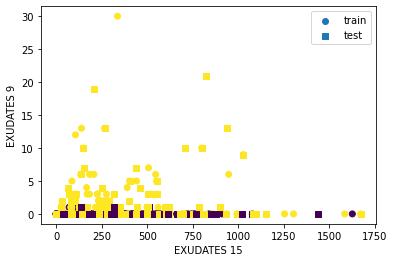

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


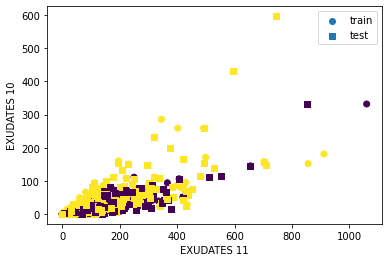

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


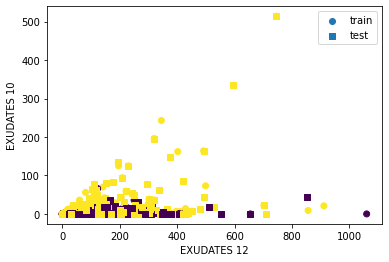

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


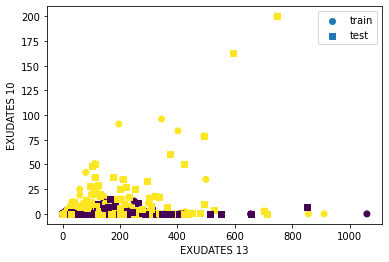

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


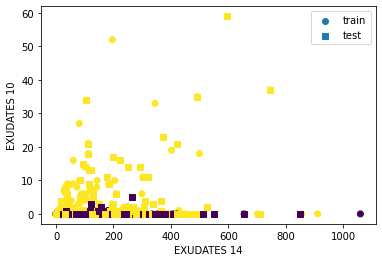

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


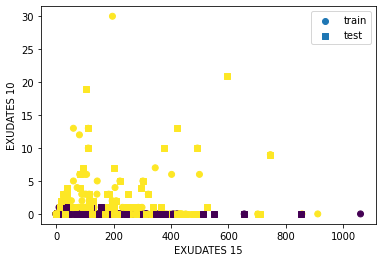

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


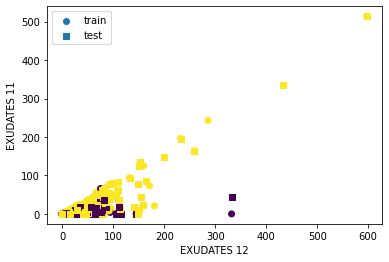

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


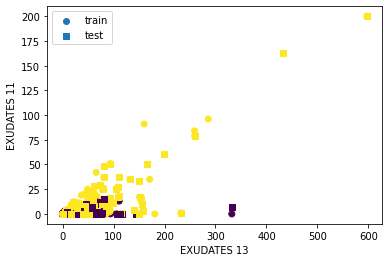

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


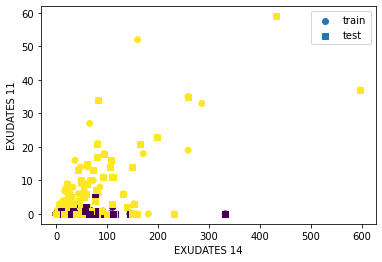

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


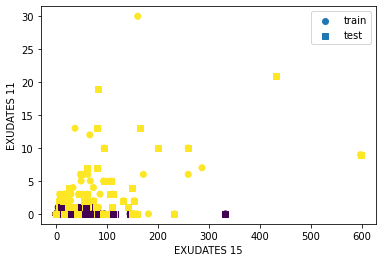

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


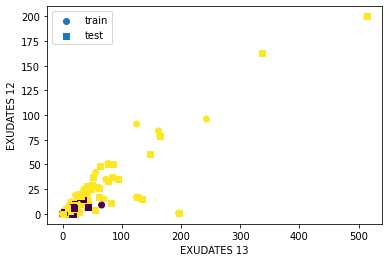

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


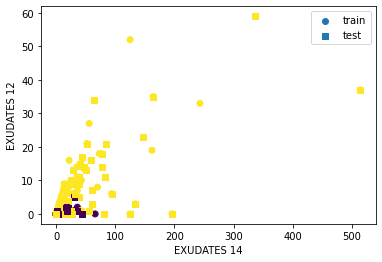

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


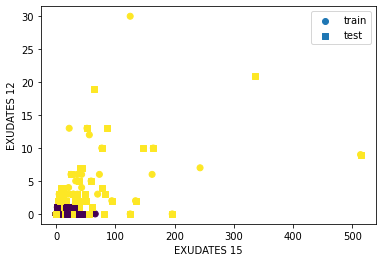

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


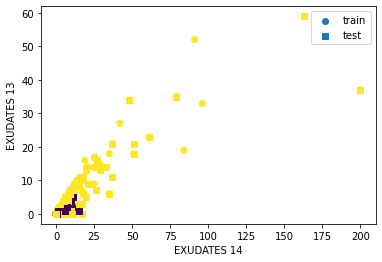

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


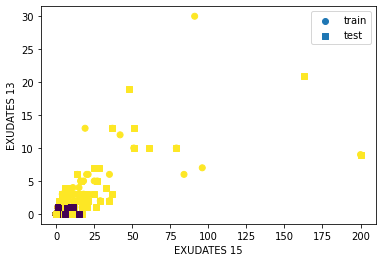

instances (N) 	 1150 
 features (D) 	 14 
 classes (C) 	 2


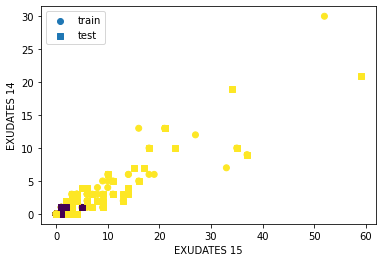

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import itertools

y = df2['CONTAINS DR'].values.astype(np.int)
xtwo = df2[['MA ALPHA 0.5', 'MA ALPHA 0.6','MA ALPHA 0.7','MA ALPHA 0.8','MA ALPHA 0.9','MA ALPHA 1','EXUDATES 8','EXUDATES 9','EXUDATES 10','EXUDATES 11','EXUDATES 12','EXUDATES 13','EXUDATES 14','EXUDATES 15']]
#x2 = df[['BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME']]
x= df2[['MA ALPHA 0.5', 'MA ALPHA 0.6','MA ALPHA 0.7','MA ALPHA 0.8','MA ALPHA 0.9','MA ALPHA 1','EXUDATES 8','EXUDATES 9','EXUDATES 10','EXUDATES 11','EXUDATES 12','EXUDATES 13','EXUDATES 14','EXUDATES 15']].values.astype(np.float) 
#x = df[["ALK PHOSPHATE","PROTIME"]].values.astype(np.int)      
x = x * 10  
x = x.astype(np.int)
np.random.seed(1232)

(N,D), C = x.shape, np.max(y) + 1

inds = np.random.permutation(N)   
x_train, y_train = x[inds[:700]], y[inds[:700]]
x_test, y_test = x[inds[300:]], y[inds[300:]]                        

#x_train, x_test = train_test_split(x, test_size = 0.3, random_state = 1)
#y_train, y_test = train_test_split(x, test_size = 0.3, random_state = 1)

possible_comb = itertools.combinations(list(range(1, 14)), 2) 
                                                                   #slices the first two columns or features from the data
for comb in possible_comb:

    print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

    (N,D), C = x.shape, np.max(y) + 1
    plt.scatter(x_train[:,comb[0]], x_train[:,comb[1]], c=(y_train), marker='o', label='train')
    plt.scatter(x_test[:,comb[0]], x_test[:,comb[1]], c=y_test, marker='s', label='test')
    plt.legend()
    plt.ylabel(xtwo.columns[comb[0]])
    plt.xlabel(xtwo.columns[comb[1]])
    plt.show()



## The `KNN` class
We implement our models as python classes. Two class methods that we usually need to implement are `fit` and `predict`; which respectively perform training by fitting the data, and making prediction on new data. In the `__init__` function, we initialize our model, usually this includes an assignment to *hyper-parameters*.

In [ ]:
#define the metric we will use to measure similarity
#if the input shapes are [1,N1,F] and [N2,1,F] then output shape is [N2,N1]
#as numpy supports broadcasting with arithmetic operations
#for more on numpy broadcasting refer to: https://numpy.org/doc/stable/user/basics.broadcasting.html   
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2,axis = -1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn=manhattan):
        self.dist_fn = dist_fn                                                    #we need to use self because the parameters would be stored in variables 
                                                                                  #on the stack and would be discarded when the init method goes out of scope
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) +1
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
                
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        # print("The shape of the distances is", distances.shape)                          
        #When operating on two arrays, NumPy compares their shapes element-wise. 
        #It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when: they are equal, or one of them is 1

        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]  
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K                                                          #nd you just divided by K so that we scale the value from zero to 1.
        return y_prob, knns

We next `fit` the model(for KNN no learning occurs in training time), and make a prediction on test set(all the computation takes place during testing). We further connect each test node to its closest nearest neighbors in the plot.

In [ ]:
def experiment(k2,xtrain,ytrain,xtest,ytest):
  accuracy_dict={}
  possible_comb2 = itertools.combinations(list(range(0,len(xtwo.columns))), 2) 
  for comb in possible_comb2:
    model = KNN(K=k2)

    y_prob, knns = model.fit(xtrain[:,[comb[0],comb[1]]], ytrain).predict(xtest[:,[comb[0],comb[1]]])
   
    y_pred = np.argmax(y_prob,axis=-1)                                                #This returns the indeces of the largest element in the array
    accuracy = np.sum(y_pred == ytest)/y_test.shape[0]
    # print(y_pred)
    #print(f'accuracy is {accuracy*100:.1f}.')

    #boolean array to later slice the indexes of correct and incorrect predictions
    correct = ytest == y_pred
    incorrect = np.logical_not(correct)

    accuracy_dict[(comb[0],comb[1])] = round(accuracy,4)
  return dict(sorted(accuracy_dict.items(), key = itemgetter(1), reverse = True)[:5])

def experiment2(k2,xtrain,ytrain,xtest,ytest):
  accuracy_dict={}
  model = KNN(K=k2)

  y_prob, knns = model.fit(xtrain, ytrain).predict(xtest)
  y_pred = np.argmax(y_prob,axis=-1)                                                
  accuracy = np.sum(y_pred == ytest)/ytest.shape[0]
  
  correct = ytest == y_pred
  incorrect = np.logical_not(correct)

  return accuracy

In [ ]:
def plot_knn(k_plot,comb0,comb1,xtrain,ytrain,xtest,ytest):
  model = KNN(K=k_plot)

  y_prob, knns = model.fit(xtrain[:,[comb0,comb1]], ytrain).predict(xtest[:,[comb0,comb1]])
    #print('knns shape:', knns.shape)
    #print('y_prob shape:', y_prob.shape)

    #To get hard predictions by choosing the class with the maximum probability
  y_pred = np.argmax(y_prob,axis=-1)                                                #This returns the indeces of the largest element in the array
  accuracy = np.sum(y_pred == ytest)/ytest.shape[0]
    # print(y_pred)
  print(f'accuracy is {accuracy*100:.1f}.')

    #boolean array to later slice the indexes of correct and incorrect predictions
  correct = ytest == y_pred
  incorrect = np.logical_not(correct)
  
  plt.scatter(xtrain[:,comb0], xtrain[:,comb1], c=ytrain, marker='o', alpha=.2, label='train')
  plt.scatter(xtest[correct,comb0], xtest[correct,comb1], marker='.', c=y_pred[correct], label='correct')
  plt.scatter(xtest[incorrect,comb0], xtest[incorrect,comb1], marker='x', c=ytest[incorrect], label='misclassified')

    #connect each node to k-nearest neighbours in the training set
  for i in range(xtest.shape[0]):
    for k_plot in range(model.K):
      hor = xtest[i,comb0], xtrain[knns[i,k_plot],comb0]
      ver = xtest[i,comb1], xtrain[knns[i,k_plot],comb1]
      plt.plot(hor, ver, 'k-', alpha=.1)
        
  plt.ylabel(xtwo.columns[comb0])
  plt.xlabel(xtwo.columns[comb1])
  plt.legend()
  plt.title(" KNN graph over Messidor for K = 7 ")
  plt.savefig("knnplotmessidor.png")
  files.download("knnplotmessidor.png")
  plt.show()
  


def plot_boundary(k_boundary,comb0,comb1,xtrain,ytrain):
  x0v = np.linspace(np.min(x[:,comb0]), np.max(x[:,comb0]), 200)
  x1v = np.linspace(np.min(x[:,comb1]), np.max(x[:,comb1]), 200)
  #print(x[comb[0]])
  #to features values as a mesh  
  x0, x1 = np.meshgrid(x0v, x1v)
  x_all = np.vstack((x0.ravel(),x1.ravel())).T
  #print(x_all)
  
  #for comb in possible_comb3:

  model = KNN(K=k_boundary)
  y_train_prob = np.zeros((ytrain.shape[0], C))
  #print(np.arange(y_train.shape[0]))
  #print(y_train)
  #print(C)
  y_train_prob[np.arange(ytrain.shape[0]),ytrain] = 1
  #print(y_train_prob)
  z = np.zeros((len(y_train_prob),1), dtype=int)
  y_train_prob = np.append(y_train_prob, z, axis=1)
  
  #to get class probability of all the points in the 2D grid
  y_prob_all, _ = model.fit(xtrain[:,[comb0,comb1]], ytrain).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1
  
  z = np.zeros((len(y_pred_all),1), dtype=np.float64)
  added = np.append(y_pred_all, z, axis=1)
  plt.scatter(xtrain[:,comb0], xtrain[:,comb1], c=(y_train_prob), marker='o', alpha=1)
  #print('works till here')
  plt.scatter(x_all[:,0], x_all[:,1], c=added, marker='.', alpha=0.01)
  plt.ylabel(xtwo.columns[comb0])
  plt.xlabel(xtwo.columns[comb1]) 
  plt.title(" Decision Boundary graph over Messidor for K = 7 ")
  #plt.savefig("boundaryplotmessidor.png")
  ##iles.download("boundaryplotmessidor.png")
  
  plt.show()
  

## The Effect of Noise and Feature Scaling
Nearest neighbours are highly affected by the existence of noisy or irrelevant features.
Lets add noise and see how it affects the accuracy of our classifier.

[3.9431211189602267, 3.695652173913045, 3.0897109572938932, 1.4542487130716995, 1.854208924916523, 2.9727813763428994, 0.6430521503369161, 2.2249445098324725, 2.4474630976516805, 2.5790892429792756]
[62.826086956521735, 63.69565217391305, 65.21739130434783, 64.02173913043478, 66.41304347826087, 65.43478260869566, 65.97826086956522, 65.54347826086956, 67.06521739130434, 66.19565217391305]
{1: 15.933085761537178, 2: 17.235294117647054, 3: 21.107926341908737, 4: 44.023926963089075, 5: 35.81745432556949, 6: 22.011299966226645, 7: 102.60172652404171, 8: 29.458477715385662, 9: 27.401932006922937, 10: 25.666289894430367}
7
{0: (0.6482608695652174, 0.016204039263986288), 1: (0.668695652173913, 0.01565217391304348), 2: (0.6182608695652174, 0.02585403260403217), 3: (0.6743478260869565, 0.019487769418273893)}
accuracy is 69.6.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

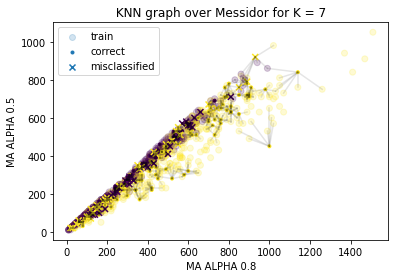

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

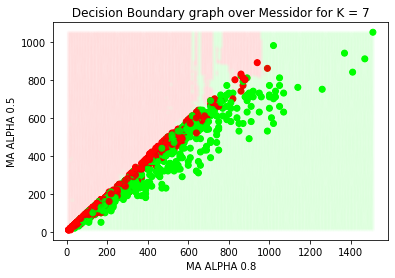

{0: (0.6482608695652174, 0.016204039263986288),
 1: (0.668695652173913, 0.01565217391304348),
 2: (0.6182608695652174, 0.02585403260403217),
 3: (0.6743478260869565, 0.019487769418273893)}

In [ ]:
from math import ceil

def validation(x, y, k_fold): #took out f variable
  (num_instances, num_features), num_classes = x.shape, np.max(y)+1
  inds = np.random.permutation(num_instances)
  #train-test split)
  split = ceil(num_instances*0.8)
  cv_split = ceil(split*(1/k_fold))

  x_train_cross, x_test_cross = train_test_split(x, test_size = 0.2, random_state = 1)
  y_train_cross, y_test_cross = train_test_split(y, test_size = 0.2, random_state = 1)

  cv_list = [[] for x in range(k_fold)]
  scores = [[] for x in range(11)]
  result={}
  accuracies = {}
  k_choice= {}
  for i in range(0,k_fold):
    #x_train, x_validation = train_test_split(x, test_size = 0.2, random_state = 1)
    #y_train, y_validation = train_test_split(y, test_size = 0.2, random_state = 1)
    x_train, y_train = np.concatenate((x[inds[:cv_split*i]], x[inds[cv_split*(i+1):cv_split*k_fold]])), np.concatenate((y[inds[:cv_split*i]], y[inds[cv_split*(i+1):cv_split*k_fold]]))
    x_validation, y_validation = x[inds[cv_split*i:cv_split*(i+1)]], y[inds[cv_split*i:cv_split*(i+1)]]
    cv_list[i].append(x_train)
    cv_list[i].append(y_train)
    cv_list[i].append(x_validation)
    cv_list[i].append(y_validation)
  #f_misclassication = open(f, 'w')
  #f_misclassication.write('k, validation accuracy, standard deviation\n')
  #f_misclassication.close()
  # K
    accuracy_fold =[]
    scoring = {}

    
    for k in range(10, 0, -1):
      # Min leaf isntances
      score = experiment2(k,cv_list[i][0],cv_list[i][1],cv_list[i][2],cv_list[i][3])
      scoring[k] = score
      scores[k].append(score*100)
    accuracies[i] = scoring
    #(np.mean(accuracy_fold), np.std(accuracy_fold))
    max_keys = dict(sorted(accuracies[i].items(), key = itemgetter(1), reverse = True)[:9])
    result[i] =(np.mean(list(scoring.values())), np.std(list(scoring.values())))
  std_score = []
  avg_score = []
  for i in range(1,len(scores)):
    std_score.append(np.std(scores[i]))
    avg_score.append(np.mean(scores[i]))
    k_choice[i] = np.mean(scores[i])/np.std(scores[i])

  print(std_score)
  print(avg_score)
  #ratio of mean/std for each k
  print(k_choice)
  print(max(k_choice, key=k_choice.get))
  print(result)
  #print("mean over all fold:")
  #print(np.mean((result.values())))
  best_k = max(k_choice, key=k_choice.get)
  
  cd = experiment(best_k,x_train_cross,y_train_cross,x_test_cross,y_test_cross)
  max_keys = dict(sorted(cd.items(), key = itemgetter(1), reverse = True)[:1])

  for key in max_keys:
    plot_knn(best_k,key[0],key[1],x_train_cross,y_train_cross,x_test_cross,y_test_cross)
    plot_boundary(best_k,key[0],key[1],x_train_cross,y_train_cross)
  #result is just the mean of all accuracy over different foil
  return result

np.random.seed(97)
#y2 = df["Class"].to_numpy()
#x2 = df.drop('Class', 1).to_numpy()
validation(x,y,4)


In [ ]:
from operator import itemgetter
#cd = experiment(15)
#cd = plot_knn(1,0,3,x_train,y_train,x_test,y_test)
#print(cd)
avg2=[]
for k in range(1,16):
  avg2.append(round(experiment2(k,x_train,y_train,x_test,y_test)*100,3))
#max_keys = dict(sorted(cd.items(), key = itemgetter(1), reverse = True)[:2])
#print(max_keys)
print(avg2)

[80.118, 72.235, 71.765, 69.765, 70.588, 70.0, 70.588, 70.471, 70.706, 70.353, 68.235, 68.471, 68.706, 68.118, 68.588]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

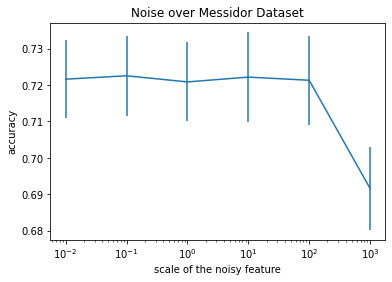

In [ ]:
noise_scale = [.01, .1, 1, 10, 100, 1000]
#generate random noise
noise = np.random.randn(x.shape[0],1)
results = []
for s in noise_scale:
    #add noise as an extra feature
    x_n = np.column_stack((x, noise*s))
    results.append([])
    #repeat the experiment 100 times with different train and test split
    for r in range(100):
        #data processing and train-test split
        inds = np.random.permutation(N)
        x_train, y_train = x_n[inds[:700]], y[inds[:700]]
        x_test, y_test = x_n[inds[300:]], y[inds[300:]]
        #define model
        model = KNN(K=3)
        #prediction
        y_prob, _ = model.fit(x_train, y_train).predict(x_test)
        y_pred = np.argmax(y_prob,1)
        accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
        results[-1].append(accuracy)
results = np.array(results)
plt.errorbar(noise_scale, results.mean(1), results.std(1))
plt.xscale('log')
plt.xlabel("scale of the noisy feature")
plt.ylabel("accuracy")
plt.title("Noise over Messidor Dataset")
plt.savefig("noiseMessidor.png")
files.download("noiseMessidor.png")
plt.show()

We see that as we increase the scale of irrelevant feature it plays a more important role when calculating distances, and so the K nearest neighbors are more decided by the noisy feature rather than the relevant ones.